In [1]:
# fmt: off
from Utilities.Utils import plot_images
from Utilities.Interpretability.InterpretabilityMethods import * 
from Utilities.SequentialLearning.Tasks.CIFAR10ClassificationTask import CIFAR10ClassificationTask as Task

import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3"
import tensorflow as tf
# fmt: on
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [4]:
MODEL_SAVE_PATH = "models/CIFAR10_MODEL/"
model:tf.keras.models.Model = tf.keras.models.load_model(MODEL_SAVE_PATH, compile=False) # type: ignore
loss_fn = tf.keras.losses.CategoricalCrossentropy(from_logits=True)

task = Task(
    "Task1",
    model,
    loss_fn,
    task_labels=[i for i in range(10)],
    training_batches=0,
    validation_batches=0,
    batch_size=32
)
task.compile_model(loss_fn)

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_0 (Conv2D)           (None, 30, 30, 64)        1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 14, 14, 64)       256       
 ormalization)                                                   
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 128)       73856 

In [13]:
data = task.validation_dataset.take(1)
data_images, data_labels = data.as_numpy_iterator().next()

In [25]:
data = task.validation_dataset.take(1)

In [44]:
def create_adversarial_example(data, label, epsilon=0.01):
    data = tf.Variable(data)
    label = tf.Variable(label)
    with tf.GradientTape() as tape:
        tape.watch(data)
        prediction = model(data)
        loss = loss_fn(label, prediction)

    # Get the gradients of the loss w.r.t to the input image.
    gradient = tape.gradient(loss, data)
    # Get the sign of the gradients to create the perturbation
    signed_grad = tf.sign(gradient)
    perturbations = signed_grad * epsilon
    return data + perturbations

In [55]:
adversarial_examples = create_adversarial_example(data_images, data_labels, epsilon=0.01)
adversarial_data_images = adversarial_examples.numpy()

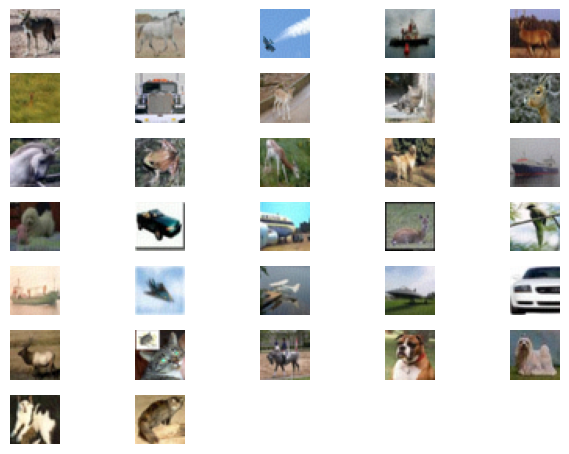

In [56]:
plot_images(adversarial_data_images)

In [22]:
prior_predictions = tf.argmax(model(data_images), axis=1)
adversarial_predictions = tf.argmax(mode(adversarial_data_images), axis=1)
for label, prior, adv in zip(tf.argmax(data_labels, axis=1), prior_predictions, adversarial_predictions):
    print(f"TRUE: {label.numpy()} PRIOR: {prior} ADVERSARIAL: {adv}")


4 7
7 7
0 0
8 8
7 4
4 4
9 9
4 4
7 3
6 4
7 7
6 6
4 4
4 5
8 8
2 5
1 1
0 0
4 4
2 2
3 8
0 0
0 0
0 0
1 1
4 4
9 3
7 7
5 5
5 5
5 3
6 3
